<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
pip install yfinance prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objs as go

In [27]:
btc=yf.download(tickers='BTC-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#bitcoin
eth=yf.download(tickers='ETH-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#etherum
bnb=yf.download(tickers='BNB-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#binance

doge=yf.download(tickers='DOGE-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#dogecoin
dot=yf.download(tickers='DOT-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#polkadot
atom=yf.download(tickers='ATOM-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#cosmos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
def clean_data_fit_model(data):
 data.reset_index(inplace=True)
 data['Date'] = pd.to_datetime(data['Date'])
 df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
 df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
 df_train = df[df['ds']<='2022-1-30']
 df_test = df[df['ds']>'2022-1-30']
 m = Prophet(interval_width=0.995, n_changepoints=15)
 m.fit(df_train)

 future = m.make_future_dataframe(periods=31)
 # Forecast the future dataframe values
 forecast = m.predict(future)
 # Check the forecasted values and upper/lower bound
 forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
 # Visualize the forecast
 fig = m.plot(forecast)
 ax = fig.gca()
 ax.plot( df_test["ds"], df_test["y"], 'r.')

 print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')
 fig = m.plot(forecast)
 a = add_changepoints_to_plot(fig.gca(), m, forecast)

 df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")

 df_p = performance_metrics(df_cv)
 df_p.head()
 return df_p

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/8u0b3y4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/wle1endk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87189', 'data', 'file=/tmp/tmp61f3b2uo/8u0b3y4a.json', 'init=/tmp/tmp61f3b2uo/wle1endk.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_model_wmxf551/prophet_model-20230112152015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
            ds             y
40  2020-02-10   9856.611328
81  2020-03-22   5830.254883
121 2020-05-01   8864.766602
162 2020-06-11   9321.781250
202 2020-07-21   9374.887695
243 2020-08-31  11680.820312
283 2020-10-10  11296.361328
324 2020-11-20  18621.314453
364 2020-12-30  28840.953125
405 2021-02-09  46481.105469
445 2021-03-21  57523.421875
486 2021-05-01  57828.050781
526 2021-06-10  36702.597656
567 2021-07-21  32110.693359
607 2021-08-30  47054.984375


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/z195nxsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/0g3s4wwy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/yagd58bg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/q9mnmc13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12463', 'data', 'file=/tmp/tmp61f3b2uo/0g3s4wwy.json', 'init=/tmp/tmp61f3b2uo/yagd58bg.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelavii4ko_/prophet_model-20230112152016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:16 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21520', 'data', 'file=/tmp/tmp61f3b2uo/z195nxsj.json', 'i

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.132842e+07,4618.270369,4205.633165,0.093371,0.108051,0.094441,0.916667
1,4 days,2.643303e+07,5141.306433,4487.502352,0.100321,0.122348,0.101297,0.750000
2,5 days,3.143904e+07,5607.052960,4522.395437,0.104513,0.122753,0.103903,0.666667
3,6 days,3.462631e+07,5884.412594,4525.378268,0.107328,0.123204,0.104964,0.666667
4,7 days,4.315466e+07,6569.220720,5042.560487,0.120848,0.113267,0.116679,0.666667


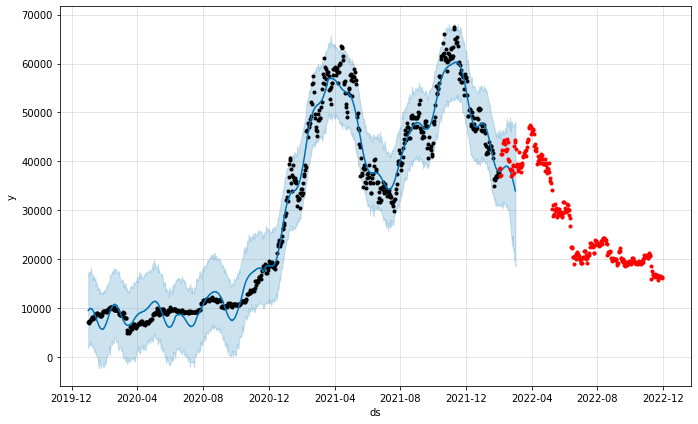

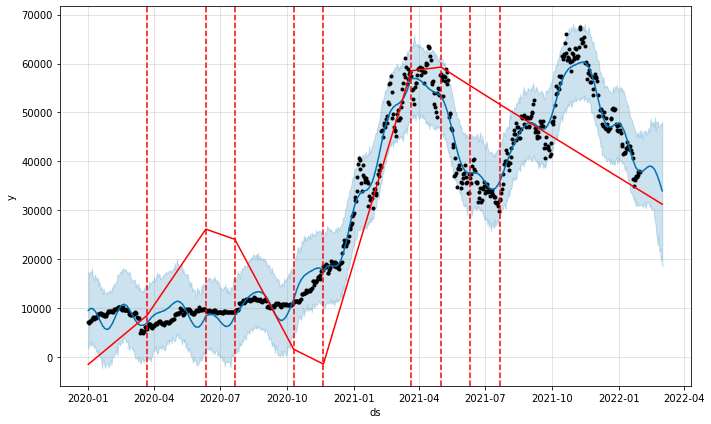

In [29]:
clean_data_fit_model(btc).head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/ueopd3f6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/404pij_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76117', 'data', 'file=/tmp/tmp61f3b2uo/ueopd3f6.json', 'init=/tmp/tmp61f3b2uo/404pij_q.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modellef_cmmx/prophet_model-20230112152020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
            ds            y
40  2020-02-10   223.522705
81  2020-03-22   123.321152
121 2020-05-01   214.219101
162 2020-06-11   231.702667
202 2020-07-21   245.016724
243 2020-08-31   435.079742
283 2020-10-10   370.967590
324 2020-11-20   509.744568
364 2020-12-30   751.618958
405 2021-02-09  1768.035034
445 2021-03-21  1788.217041
486 2021-05-01  2945.892822
526 2021-06-10  2471.518555
567 2021-07-21  1990.970825
607 2021-08-30  3224.374268


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/crbyk33_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/_0pgna53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/fs040nlk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/0zora0a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71462', 'data', 'file=/tmp/tmp61f3b2uo/crbyk33_.json', 'init=/tmp/tmp61f3b2uo/0zora0a5.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelmpkg4zkn/prophet_model-20230112152021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49016', 'data', 'file=/tmp/tmp61f3b2uo/_0pgna53.json', 'init=/tmp/tmp61f3b2uo/fs040nlk.json', 'output', 'file=/tmp

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,5.040836e+05,709.988457,635.469708,0.164410,0.163368,0.172012,0.250000
1,4 days,5.186589e+05,720.179742,649.274548,0.170975,0.167431,0.177631,0.333333
2,5 days,5.272844e+05,726.143497,660.969007,0.182033,0.159312,0.183687,0.500000
3,6 days,5.707513e+05,755.480839,693.903122,0.199847,0.167616,0.195612,0.500000
4,7 days,6.930944e+05,832.522886,746.871478,0.220438,0.172465,0.208866,0.500000
5,8 days,8.540518e+05,924.149233,815.659092,0.248180,0.179568,0.229124,0.416667
6,9 days,9.542480e+05,976.856198,855.621959,0.269929,0.182096,0.243595,0.416667
7,10 days,1.025652e+06,1012.744542,888.139799,0.287248,0.212650,0.255953,0.250000
8,11 days,1.026885e+06,1013.353384,900.527430,0.294255,0.235828,0.262006,0.166667
9,12 days,1.025805e+06,1012.820077,914.765977,0.297820,0.239996,0.266798,0.083333


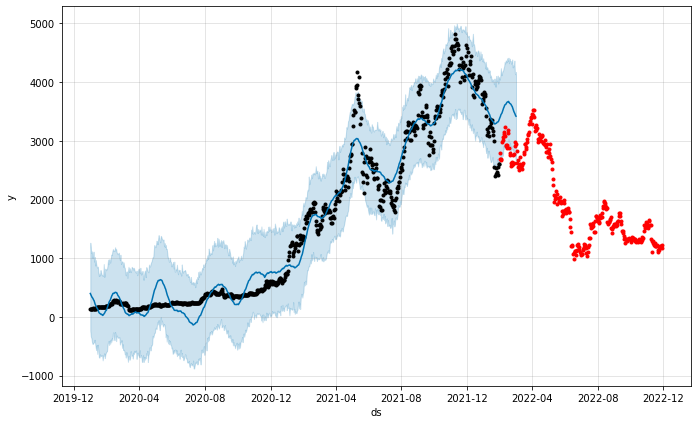

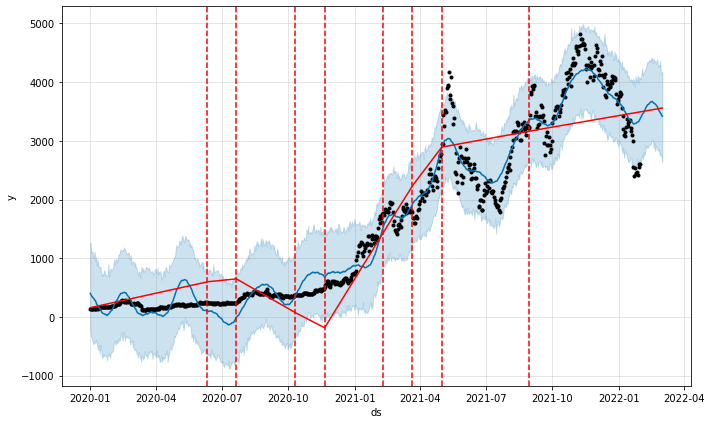

In [30]:
clean_data_fit_model(eth)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/10_ciln2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/wg_5nats.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59494', 'data', 'file=/tmp/tmp61f3b2uo/10_ciln2.json', 'init=/tmp/tmp61f3b2uo/wg_5nats.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_model16a7wzb7/prophet_model-20230112152026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
            ds           y
40  2020-02-10   25.218315
81  2020-03-22   11.158228
121 2020-05-01   17.564993
162 2020-06-11   16.308926
202 2020-07-21   17.715408
243 2020-08-31   23.193050
283 2020-10-10   28.312487
324 2020-11-20   28.891996
364 2020-12-30   38.136299
405 2021-02-09  107.899277
445 2021-03-21  264.886169
486 2021-05-01  619.347229
526 2021-06-10  352.183197
567 2021-07-21  292.531372
607 2021-08-30  459.490753


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/qn0roayr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/d9d9_52n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/b3jqzi4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88881', 'data', 'file=/tmp/tmp61f3b2uo/qn0roayr.json', 'init=/tmp/tmp61f3b2uo/b3jqzi4l.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelsd0zbftc/prophet_model-20230112152028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/jxegcph0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15699', 'data',

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,6982.989603,83.564284,70.844012,0.138401,0.150586,0.149936,0.833333
1,4 days,8908.548430,94.385107,79.537179,0.151861,0.164688,0.165686,0.666667
2,5 days,10575.156376,102.835579,86.032185,0.164114,0.164688,0.176402,0.666667
3,6 days,12565.882387,112.097647,92.384064,0.175000,0.189131,0.186305,0.666667
4,7 days,14424.350896,120.101419,97.120694,0.185162,0.200296,0.193388,0.666667
5,8 days,15888.176354,126.048310,102.790713,0.201013,0.206542,0.206212,0.583333
6,9 days,16220.355326,127.359159,106.330102,0.215537,0.220997,0.217224,0.500000
7,10 days,16783.563092,129.551392,110.180422,0.229817,0.235595,0.228735,0.500000
8,11 days,16239.051729,127.432538,109.398624,0.227124,0.235595,0.227966,0.500000
9,12 days,16905.836897,130.022448,111.906907,0.227393,0.234319,0.232620,0.500000


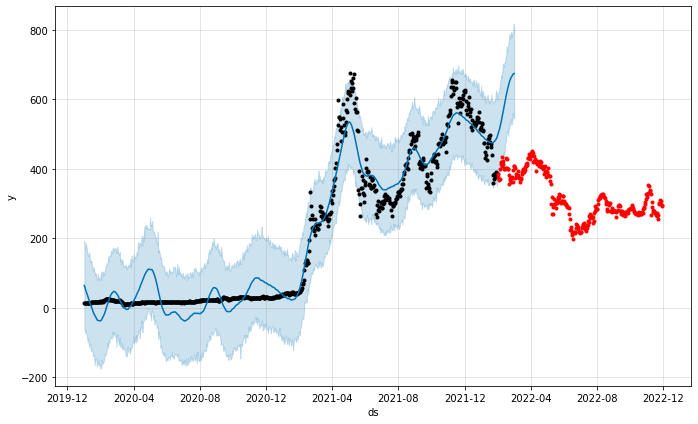

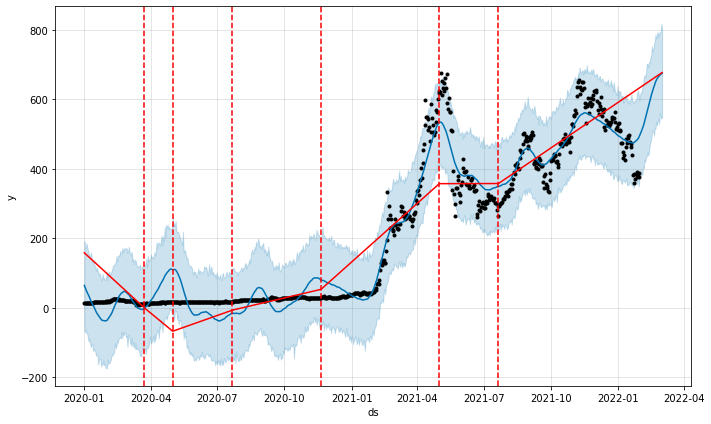

In [31]:
clean_data_fit_model(bnb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/8yc0tvrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/lgc9zlx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33491', 'data', 'file=/tmp/tmp61f3b2uo/8yc0tvrh.json', 'init=/tmp/tmp61f3b2uo/lgc9zlx8.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modeleytg_4dd/prophet_model-20230112152034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


There are 15 change points. 
The change points dates are 
            ds         y
40  2020-02-10  0.002986
81  2020-03-22  0.001731
121 2020-05-01  0.002494
162 2020-06-11  0.002452
202 2020-07-21  0.003305
243 2020-08-31  0.003221
283 2020-10-10  0.002655
324 2020-11-20  0.002984
364 2020-12-30  0.004636
405 2021-02-09  0.070070
445 2021-03-21  0.057234
486 2021-05-01  0.392987
526 2021-06-10  0.326351
567 2021-07-21  0.190349
607 2021-08-30  0.272125


INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9ac3887e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/bofvtjud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/0najllyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/vgjqqxr9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/we0pc575.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71220', 'data', 'file=/tmp/tmp61f3b2uo/0najllyt.json', 'init=/tmp/tmp61f3b2uo/vgjqqxr9.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelccxz7lsx/prophet_model-20230112152036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:36 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:running 

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,0.002451,0.049509,0.039193,0.155215,0.121012,0.145380,1.000000
1,4 days,0.003133,0.055973,0.043185,0.175740,0.121012,0.160623,0.916667
2,5 days,0.003461,0.058827,0.042957,0.182290,0.101452,0.162086,0.916667
3,6 days,0.003664,0.060530,0.042064,0.186751,0.095759,0.161449,0.916667
4,7 days,0.003708,0.060891,0.041902,0.189441,0.105130,0.163669,1.000000
5,8 days,0.004275,0.065384,0.046783,0.213938,0.122570,0.184335,0.916667
6,9 days,0.004841,0.069580,0.049453,0.232842,0.123212,0.196768,0.833333
7,10 days,0.005434,0.073719,0.051487,0.252242,0.132337,0.207379,0.750000
8,11 days,0.006217,0.078850,0.052837,0.268300,0.127478,0.212419,0.750000
9,12 days,0.007380,0.085908,0.055669,0.292014,0.134846,0.221634,0.750000


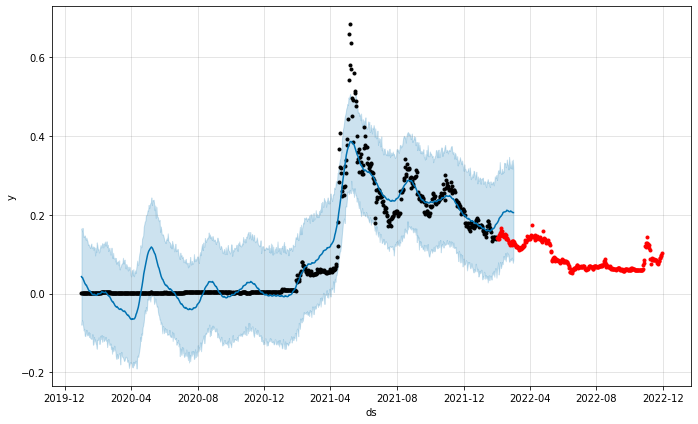

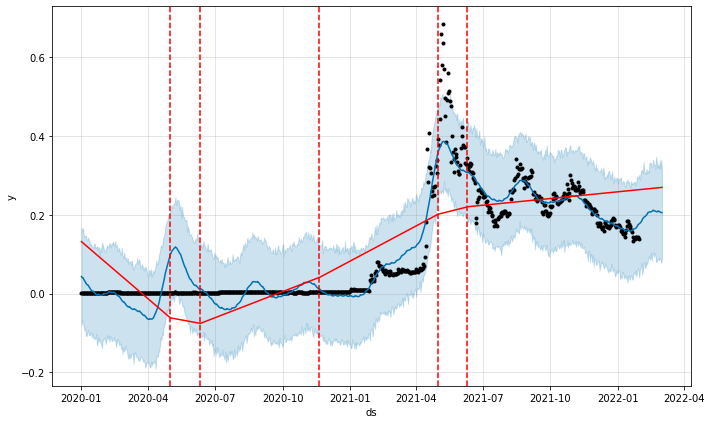

In [32]:
clean_data_fit_model(doge)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/ao_twwp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/0gjxvx3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99064', 'data', 'file=/tmp/tmp61f3b2uo/ao_twwp5.json', 'init=/tmp/tmp61f3b2uo/0gjxvx3i.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_model28lo0q44/prophet_model-20230112152042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
            ds          y
40  2020-02-10   4.788741
81  2020-03-22   1.924433
121 2020-05-01   2.847445
162 2020-06-11   2.771308
202 2020-07-21   3.996589
243 2020-08-31   7.211945
283 2020-10-10   5.525700
324 2020-11-20   5.270237
364 2020-12-30   5.436162
405 2021-02-09  15.086408
445 2021-03-21  20.507261
486 2021-05-01  23.819658
526 2021-06-10  12.808161
567 2021-07-21  10.417186
607 2021-08-30  22.100243


DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/wmuxxnnz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/9t2g_svv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/wmj075f0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp61f3b2uo/cxghdvuw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=651', 'data', 'file=/tmp/tmp61f3b2uo/wmuxxnnz.json', 'init=/tmp/tmp61f3b2uo/cxghdvuw.json', 'output', 'file=/tmp/tmp61f3b2uo/prophet_modelc8fpouhm/prophet_model-20230112152043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61278', 'data', 'file=/tmp/tmp61f3b2uo/9t2g_svv.json', 'init=/tmp/tmp61f3b2uo/wmj075f0.json', 'output', 'file=/tmp/t

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,24.306478,4.930160,3.945242,0.161036,0.139280,0.184399,0.750000
1,4 days,31.392421,5.602894,4.461574,0.168841,0.139280,0.194946,0.750000
2,5 days,30.710977,5.541749,4.682084,0.175566,0.139280,0.199788,0.750000
3,6 days,26.998382,5.195997,4.638069,0.179825,0.145400,0.201309,0.750000
4,7 days,30.261066,5.501006,4.717380,0.190949,0.145400,0.217884,0.750000
5,8 days,48.112186,6.936295,5.398024,0.208784,0.148381,0.247712,0.750000
6,9 days,64.248955,8.015545,6.022139,0.222453,0.148381,0.267159,0.666667
7,10 days,94.635738,9.728090,6.837594,0.231677,0.148381,0.284342,0.583333
8,11 days,124.063886,11.138397,7.747557,0.246166,0.166381,0.305255,0.500000
9,12 days,148.418703,12.182721,8.398973,0.252356,0.159629,0.321912,0.500000


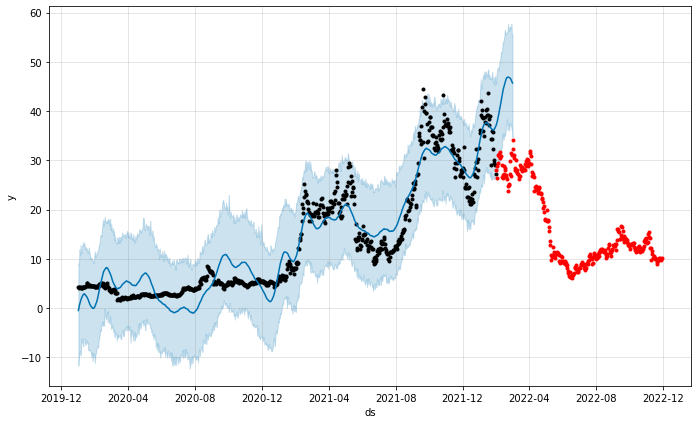

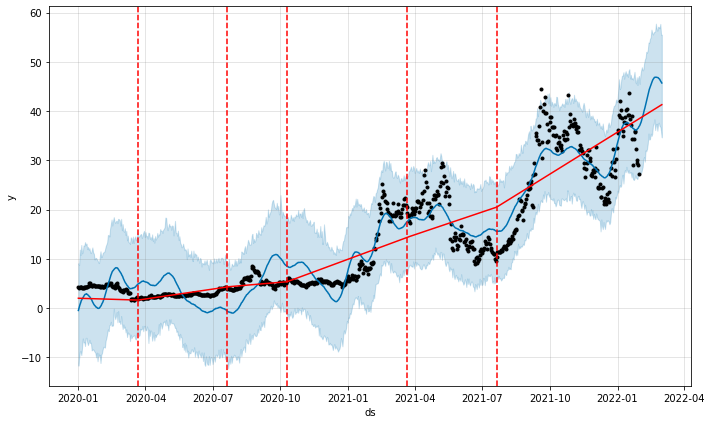

In [33]:
clean_data_fit_model(atom)